In [1]:
#Importing libraries

import pandas as pd
import sqlite3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
from IPython.display import HTML

HTML("<style>.container { width:100% !important; }</style>")

In [3]:
#Importing dataset

data_retail = pd.read_excel('./OnlineRetail.xlsx')

In [4]:
#creating a copy
df = data_retail.copy()
print(df.shape)

(541909, 8)


In [5]:
#Creating database

conn = sqlite3.connect("dbsales")
cur = conn.cursor() 


In [6]:
#Loading dataset to database

df.to_sql('dimsales', con=conn, if_exists='replace')

In [7]:
#checking if data loaded to table

pd.read_sql('SELECT * FROM dimsales', conn)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
#Creating function to connect with database

def Q(sql):
    conn = sqlite3.connect("dbsales")
    Q = pd.read_sql_query("SELECT * from dimsales", con=conn)

    return pd.read_sql_query(sql ,conn)

In [9]:
#Checking data

Q("select * from dimsales")

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
#Getting table schema

Q("PRAGMA table_info('dimsales');")

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,InvoiceNo,TEXT,0,None,0
2,2,StockCode,TEXT,0,None,0
3,3,Description,TEXT,0,None,0
4,4,Quantity,INTEGER,0,None,0
5,5,InvoiceDate,TIMESTAMP,0,None,0
6,6,UnitPrice,REAL,0,None,0
7,7,CustomerID,REAL,0,None,0
8,8,Country,TEXT,0,None,0


In [11]:
#Counting number of records (rows)

Q("SELECT count (*) from dimsales",)

,count (*)
0,541909


In [12]:
#Counting number distinct inv.

Q("SELECT COUNT(DISTINCT InvoiceNo) as UniqueInvoices from dimsales;")

,UniqueInvoices
0,25900


In [13]:
#Checking number of unique CustID's

Q("SELECT COUNT(DISTINCT CustomerID) as UniqueCustID from dimsales;")

,UniqueCustID
0,4372


In [14]:
#Checking buyer countries

C = Q("SELECT distinct Country , \
      COUNT(DISTINCT CustomerID) as Customers,\
      Count(InvoiceNo) as Orders from dimsales \
      group by Country ORDER by InvoiceNo ASC ")

C

,Country,Customers,Orders
0,United Kingdom,3950,495478
1,France,87,8557
2,Australia,9,1259
3,Netherlands,9,2371
4,Germany,95,9495
5,Norway,10,1086
6,EIRE,3,8196
7,Switzerland,21,2002
8,Spain,31,2533
9,Poland,6,341


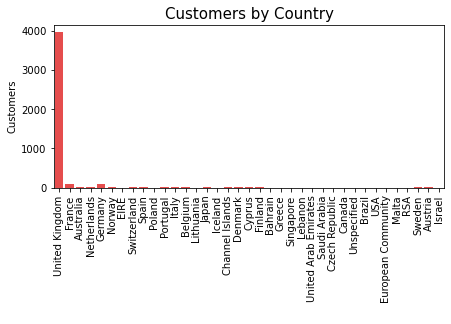

In [15]:
# Checking (visualisation ) how many customers by Country

Contr = C[C['Customers']>0]
Contry_cust = Contr.groupby('Country')['Customers'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7,3))
sns.barplot(x= Contr['Country'], y=Contr['Customers'], color="red", alpha=0.8)
plt.title("Customers by Country", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [16]:
#Checking for Nulls %

df_nulls = Q("select * from dimsales")

df_nulls.isnull().sum() * 100 / len(df_nulls)


index           0.000000
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [17]:
#Changing data type to datetime

df_nulls['InvoiceDate']=pd.to_datetime(df_nulls['InvoiceDate'])

df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [18]:
#Getting statistics summary

df_nulls.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


Note: There are many negative numbers which may be cancelled items or returns 

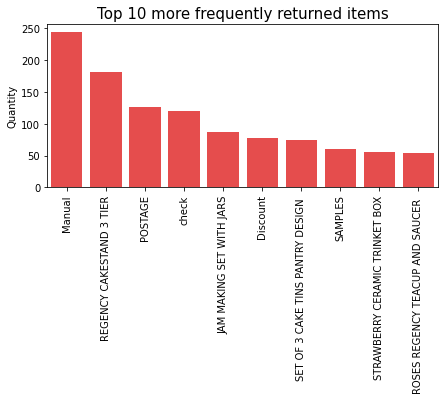

In [19]:
#checking for most frequently returned items

refunds = df_nulls[df_nulls['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(7,3))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'], color="red", alpha=0.8)
plt.title("Top 10 more frequently returned items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [20]:
#Checking reason for high values as per descriptive analysis

df_nulls[df_nulls['UnitPrice']>1000].head(20)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
28994,28994,C538682,M,Manual,-1,2010-12-13 17:14:00,1130.90,NaN,United Kingdom
41448,41448,539856,M,Manual,1,2010-12-22 14:41:00,1298.40,NaN,United Kingdom
43702,43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom


In [21]:
# Printing the details of the dataset

maxdate = df_nulls['InvoiceDate'].dt.date.max()
mindate = df_nulls['InvoiceDate'].dt.date.min()
unique_cust = df_nulls['CustomerID'].nunique()
unique_stocks = df_nulls['StockCode'].nunique()
tot_quantity = df_nulls['Quantity'].sum()
tot_sales = df_nulls['Quantity'].multiply(df_nulls['UnitPrice']).sum()

print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total number of unique stocks: {unique_stocks}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: {tot_sales}")

The Time range of transactions is: 2010-12-01 to 2011-12-09
Total number of unique customers: 4372
Total number of unique stocks: 4070
Total Quantity Sold: 5176450
Total Sales for the period: 9747747.933999998


**DATA PREPROCESSING and EDA**

In [22]:
# Cleaning the dataset SQL - removing cancelled, not orders, and negative transactions

dataretail = Q("SELECT * FROM dimsales WHERE StockCode NOT like '%[0-9]%'\
         AND StockCode NOT like '%A%'\
         AND StockCode NOT like '%B%' \
         AND StockCode NOT like '%G%'\
         AND StockCode NOT like '%E%' \
         AND StockCode NOT like '%M%'\
         AND StockCode NOT like '%D%' \
         AND StockCode NOT like '%gift_0001_20%'\
         AND StockCode NOT like '%gift_0001_10%'\
         AND StockCode NOT like '%gift_0001_30%'\
         AND StockCode NOT like '%22467%'\
         AND StockCode NOT like'%C%' \
         AND StockCode NOT like '%S%' \
         AND StockCode NOT like '%W%' \
         AND StockCode NOT like '%L%' \
         AND StockCode NOT like '%F%' \
         AND StockCode NOT like '%P%' \
         AND StockCode NOT like '%J%' \
         AND StockCode NOT like '%21319%' \
         AND StockCode NOT like '%17109D%' \
         AND StockCode NOT like '%21621%' \
         AND StockCode NOT like '%DCGS0057%' \
         AND StockCode NOT like '%21181%'\
         AND StockCode NOT like '%23444%'\
         AND StockCode NOT like '%84929%'\
         AND StockCode NOT like '%23343%'\
         AND StockCode NOT like '%20713%'\
         AND StockCode NOT like '%23595%'\
         AND StockCode NOT like '%21829%'\
         AND StockCode NOT like '%21915%'\
         AND StockCode NOT like '%20832%'\
         AND StockCode NOT like '%23157%'\
         AND StockCode NOT like '%85107%'\
         AND StockCode NOT like '%CRUK%'\
         AND StockCode NOT like '%POST%'\
         AND StockCode NOT like '%AMAZONFEE%'\
         AND StockCode NOT like '%BANK CHARGES%'\
         AND InvoiceNo NOT LIKE '%C%'\
         AND Description NOT LIKE '%?%'\
         AND CustomerID IS NOT NULL\
         AND Description IS NOT NULL\
         AND Quantity >0 \
         AND UnitPrice >0 ") 

cur.close()

In [23]:
#Checking for nulls and data types

dataretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360728 entries, 0 to 360727
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        360728 non-null  int64  
 1   InvoiceNo    360728 non-null  object 
 2   StockCode    360728 non-null  object 
 3   Description  360728 non-null  object 
 4   Quantity     360728 non-null  int64  
 5   InvoiceDate  360728 non-null  object 
 6   UnitPrice    360728 non-null  float64
 7   CustomerID   360728 non-null  float64
 8   Country      360728 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 24.8+ MB


In [24]:
#Checking null values 

dataretail.isnull().sum() * 100 / len(dataretail)

index          0.0
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

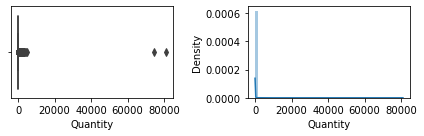

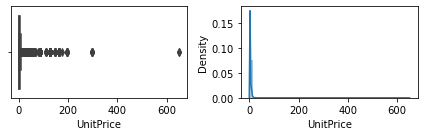

In [25]:
#Visualizing Quantity and UnitPrice distributions and outliers

#Note: Metrics are positively skewed/right skewed. 

columns = ['Quantity','UnitPrice']

for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=dataretail[i],orient = 'v',ax = axes[0])
    sns.distplot(dataretail[i],ax = axes[1])
    fig.tight_layout()

In [26]:
#Identifying upper & lower limits-Quantile-based hard edges

upper_limit = dataretail.iloc[:,[4,6]].quantile(0.99)  
lower_limit = dataretail.iloc[:,[4,6]].quantile(0.01)


print("Highest allowed",upper_limit, '\n ')
print("Lowest allowed",lower_limit, '\n ')


print(dataretail[["Quantity"]].skew())
print(dataretail[["UnitPrice"]].skew())

Highest allowed Quantity     120.00
UnitPrice     12.75
Name: 0.99, dtype: float64 
 
Lowest allowed Quantity     1.00
UnitPrice    0.21
Name: 0.01, dtype: float64 
 
Quantity    393.047101
dtype: float64
UnitPrice    36.298725
dtype: float64


Note: There are many outliers on the dataset, however; since this is a whole sale store only extremely values will be removed (1%) 

In [27]:
#Removing outliers - hard edges

lower_limit = dataretail.Quantity.quantile(0.01)
upper_limit = dataretail.Quantity.quantile(0.99)

dataretail = dataretail[(dataretail.Quantity >= lower_limit)
                        & (dataretail.Quantity <= upper_limit)]

lower_limit = dataretail.UnitPrice.quantile(0.01)
upper_limit = dataretail.UnitPrice.quantile(0.99)

dataretail = dataretail[(dataretail.UnitPrice >= lower_limit) 
                        & (dataretail.UnitPrice <= upper_limit)]

print(dataretail[["Quantity"]].skew())
print(dataretail[["UnitPrice"]].skew())

Quantity    3.94916
dtype: float64
UnitPrice    1.818721
dtype: float64


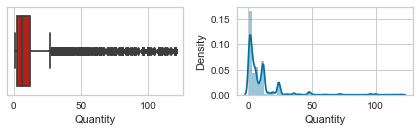

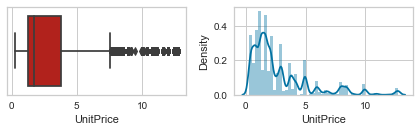

In [148]:
#Visualizing Quantity and UnitPrice distributions and outliers after outliers removal

#Note: Metrics are positively skewed/right skewed. 

columns = ['Quantity','UnitPrice']

for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=dataretail[i],orient = 'v',ax = axes[0],color = 'r')
    sns.distplot(dataretail[i],ax = axes[1])
    fig.tight_layout()

In [29]:
#Changing data type to datetime
dataretail['InvoiceDate']=pd.to_datetime(dataretail['InvoiceDate'])

In [30]:
#Extractin Months and Years for further analysis 

dataretail['Month'] = pd.DatetimeIndex(dataretail['InvoiceDate']).month
dataretail['Month_name']=dataretail['InvoiceDate'].dt.month_name()
dataretail['Year']=dataretail['InvoiceDate'].dt.year
dataretail['Year_Month']=dataretail['Year'].apply(str)+' '+dataretail['Month_name'].apply(str)

dataretail

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Month_name,Year,Year_Month
0,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,December,2010,2010 December
1,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,12,December,2010,2010 December
2,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12,December,2010,2010 December
3,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,December,2010,2010 December
4,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,12,December,2010,2010 December
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360723,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,December,2011,2011 December
360724,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,December,2011,2011 December
360725,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,December,2011,2011 December
360726,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,December,2011,2011 December


In [31]:
# Loading cleaned data into the database
dataretail.to_sql('dimsales', con=conn, if_exists='replace')

In [32]:
dim_clean = Q("select*from dimsales ")

In [33]:
dim_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350487 entries, 0 to 350486
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   level_0      350487 non-null  int64  
 1   index        350487 non-null  int64  
 2   InvoiceNo    350487 non-null  object 
 3   StockCode    350487 non-null  object 
 4   Description  350487 non-null  object 
 5   Quantity     350487 non-null  int64  
 6   InvoiceDate  350487 non-null  object 
 7   UnitPrice    350487 non-null  float64
 8   CustomerID   350487 non-null  float64
 9   Country      350487 non-null  object 
 10  Month        350487 non-null  int64  
 11  Month_name   350487 non-null  object 
 12  Year         350487 non-null  int64  
 13  Year_Month   350487 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 37.4+ MB


**DATA EXPLORATION ANALYSIS** 

In [34]:
#Which product sells the most?

bestseller = Q("SELECT Description, sum(Quantity*UnitPrice) as Revenue,\
Count(InvoiceNo) From dimsales Group By Description Order by 2 desc Limit 10")

bestseller

,Description,Revenue,Count(InvoiceNo)
0,REGENCY CAKESTAND 3 TIER,129122.35,1706
1,PARTY BUNTING,61166.83,1384
2,ASSORTED COLOUR BIRD ORNAMENT,37428.74,1355
3,CHILLI LIGHTS,36751.47,517
4,PAPER CHAIN KIT 50'S CHRISTMAS,35337.23,1011
5,SPOTTY BUNTING,30575.85,1010
6,JAM MAKING SET WITH JARS,30038.77,884
7,RABBIT NIGHT LIGHT,27158.88,819
8,SET OF 3 CAKE TINS PANTRY DESIGN,26974.48,1154
9,LUNCH BAG RED RETROSPOT,26960.95,1312


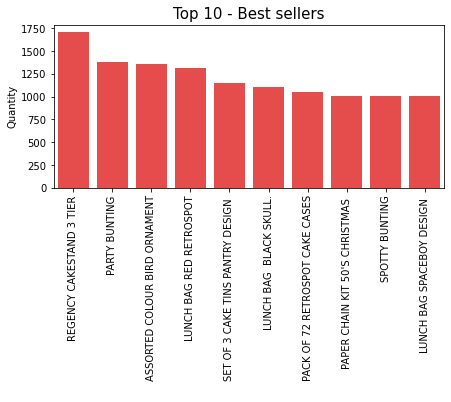

In [35]:
# Checking for most popular items

prod_seller= dim_clean[dim_clean['Quantity']>0]
prod_seller = prod_seller.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(7,3))
sns.barplot(x= prod_seller['Description'], y=prod_seller['Quantity'], color="red", alpha=0.8)
plt.title("Top 10 - Best sellers", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [37]:
#Which year generated more revenue

Q("SELECT Year, sum(Quantity*UnitPrice) as Revenue\
From dimsales Group By Year Order by 2 desc")


,Year,Revenue
0,2011,5.798397e+06
1,2010,3.963944e+05


In [38]:
#Checking for the best month sales 

Q("SELECT Month, Year, sum(Quantity*UnitPrice) AS Revenue,\
count(InvoiceNo) as TotalInvoices From dimsales Group \
By Month Order by 2 desc LIMIT 3")

,Month,Year,Revenue,TotalInvoices
0,11,2011,906030.07,58063
1,10,2011,740535.01,44194
2,9,2011,676732.51,35626


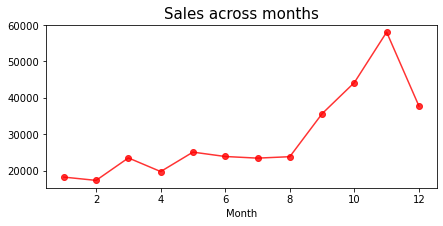

In [39]:
# Visualisation of sales across months

month = dim_clean.groupby('Month')['Quantity'].count()
plt.figure(figsize=(7,3))
month.plot(marker='o', color="red", alpha=0.8)
plt.title("Sales across months", size=15)
plt.show()

In [40]:
#Which products was the best seller in November?

sellers = Q("SELECT Month, Description, sum(Quantity*UnitPrice) as Revenue,\
Count(InvoiceNo) From dimsales where Year ='2011' and Month_name = 'November'\
Group By Month_name,Description Order by 3 desc Limit 10")

sellers

,Month,Description,Revenue,Count(InvoiceNo)
0,11,RABBIT NIGHT LIGHT,14549.65,456
1,11,PAPER CHAIN KIT 50'S CHRISTMAS,12212.01,355
2,11,REGENCY CAKESTAND 3 TIER,10964.40,170
3,11,HOT WATER BOTTLE KEEP CALM,8006.10,270
4,11,PAPER CHAIN KIT VINTAGE CHRISTMAS,7736.11,238
5,11,CHILLI LIGHTS,7560.83,92
6,11,CHOCOLATE HOT WATER BOTTLE,6553.35,192
7,11,JUMBO BAG 50'S CHRISTMAS,5984.56,233
8,11,BAKING SET 9 PIECE RETROSPOT,5308.60,197
9,11,ASSORTED COLOUR BIRD ORNAMENT,5120.70,200


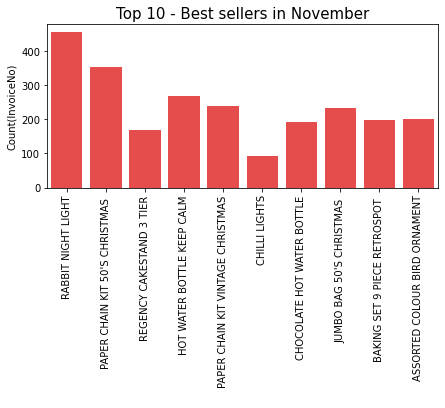

In [41]:
# Visualisation of best sellers products in November


sellerr= dim_clean[dim_clean['Quantity']>0]
sellerr = sellers.groupby('Description')['Count(InvoiceNo)'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(7,3))
sns.barplot(x= sellers['Description'], y=sellers['Count(InvoiceNo)'],color="red", alpha=0.8)
plt.title("Top 10 - Best sellers in November", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [45]:
#Checking sales by Country

TC = Q("SELECT CustomerID, Country, sum(Quantity*UnitPrice) \
       as TotalSales,avg(Quantity*UnitPrice) as AvgSales, \
       Count(InvoiceNo) as Orders from dimsales GROUP BY CustomerID")

TC.head(5)

,CustomerID,Country,TotalSales,AvgSales,Orders
0,12347.0,Iceland,3397.85,21.236563,160
1,12348.0,Finland,1186.68,56.508571,21
2,12349.0,Italy,1318.10,19.383824,68
3,12350.0,Norway,251.50,19.346154,13
4,12352.0,Norway,1373.24,18.068947,76


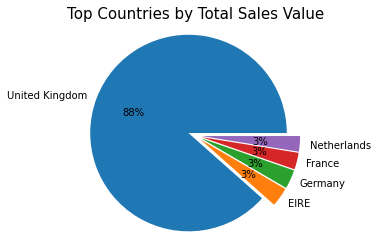

In [47]:
# Top countries by sales value

top_country = TC.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)[:10]
labels = top_country[:5].index
size = top_country[:5].values

plt.figure(figsize=(5,4))
plt.pie(size, labels=labels, explode=[0.07]*5, autopct='%1.0f%%')
plt.title("Top Countries by Total Sales Value", size=15)
plt.axis('equal')
plt.show()

**Recency, Frequency and Monetary - RFM analysis**

In [46]:
#calculating Monetary (How much spent) and Frequency (how often the purchases)

R_df = Q("SELECT CustomerID, Country, sum(Quantity*UnitPrice) as Monetary,\
         avg(Quantity*UnitPrice) as AvgMonetaryValue, Count(InvoiceNo) as Frequency,\
         MAX(InvoiceDate) as last_order_date, (select MAX(InvoiceDate) from dimsales) as max_order_date\
         from dimsales GROUP BY CustomerID")

R_df.head(5)

,CustomerID,Country,Monetary,AvgMonetaryValue,Frequency,last_order_date,max_order_date
0,12347.0,Iceland,3397.85,21.236563,160,2011-12-07 15:52:00,2011-12-09 12:50:00
1,12348.0,Finland,1186.68,56.508571,21,2011-09-25 13:13:00,2011-12-09 12:50:00
2,12349.0,Italy,1318.10,19.383824,68,2011-11-21 09:51:00,2011-12-09 12:50:00
3,12350.0,Norway,251.50,19.346154,13,2011-02-02 16:01:00,2011-12-09 12:50:00
4,12352.0,Norway,1373.24,18.068947,76,2011-11-03 14:37:00,2011-12-09 12:50:00


In [48]:
# Loading new data into the database

R_df.to_sql("rfmsales", con=conn, if_exists='replace')


In [49]:
#Calculating Recency - How long ago was last order?

rfm_data = Q("SELECT CustomerID, Country, Frequency, Monetary,\
             round(JULIANDAY(max_order_date) - JULIANDAY(last_order_date))\
             AS Recency from rfmsales GROUP BY CustomerID")

rfm_data

,CustomerID,Country,Frequency,Monetary,Recency
0,12347.0,Iceland,160,3397.85,2.0
1,12348.0,Finland,21,1186.68,75.0
2,12349.0,Italy,68,1318.10,18.0
3,12350.0,Norway,13,251.50,310.0
4,12352.0,Norway,76,1373.24,36.0
...,...,...,...,...,...
4265,18280.0,United Kingdom,9,165.30,277.0
4266,18281.0,United Kingdom,4,31.62,180.0
4267,18282.0,United Kingdom,12,178.05,7.0
4268,18283.0,United Kingdom,709,1872.03,3.0


In [50]:
# Converting Days_from_last_purchase to int since this contains number of days
    
rfm_data['Recency'] = rfm_data['Recency'].astype(int)

rfm_data.head(5)

,CustomerID,Country,Frequency,Monetary,Recency
0,12347.0,Iceland,160,3397.85,2
1,12348.0,Finland,21,1186.68,75
2,12349.0,Italy,68,1318.10,18
3,12350.0,Norway,13,251.50,310
4,12352.0,Norway,76,1373.24,36


In [51]:
# Loading new data into the database

rfm_data.to_sql("rfms_new", con=conn, if_exists='replace')

In [52]:
#calculate RFM scores with NTILE function

rfm_score = Q("SELECT CustomerID, R_score, F_score, M_score,\
             R_score*100 + F_score*10 + M_score AS RFM FROM ( SELECT CustomerID,\
             NTILE(4) OVER (ORDER BY Recency desc) AS R_score,\
             NTILE(4) OVER (ORDER BY Frequency) AS F_score,\
             NTILE(4) OVER (ORDER BY Monetary) AS M_score FROM rfms_new)")

cur.close()


In [53]:

rfm_score

,CustomerID,R_score,F_score,M_score,RFM
0,13747.0,1,1,1,111
1,12791.0,1,1,1,111
2,15350.0,1,1,1,111
3,17643.0,1,1,1,111
4,14237.0,1,1,1,111
...,...,...,...,...,...
4265,17364.0,4,4,4,444
4266,17581.0,4,4,4,444
4267,16558.0,4,4,4,444
4268,15311.0,4,4,4,444


In [54]:
# Loading new data into the database

rfm_score.to_sql("rfms_s", con=conn, if_exists='replace')

In [55]:
#Creating RFM total score column 

rfm_score = Q("Select CustomerID,\
              R_score, F_score, M_score, R_score + F_score+ M_score\
              as RFM_Score, RFM from rfms_s")

rfm_score

,CustomerID,R_score,F_score,M_score,RFM_Score,RFM
0,13747.0,1,1,1,3,111
1,12791.0,1,1,1,3,111
2,15350.0,1,1,1,3,111
3,17643.0,1,1,1,3,111
4,14237.0,1,1,1,3,111
...,...,...,...,...,...,...
4265,17364.0,4,4,4,12,444
4266,17581.0,4,4,4,12,444
4267,16558.0,4,4,4,12,444
4268,15311.0,4,4,4,12,444


In [56]:
# loading new data into the database

rfm_score.to_sql("rfm_combo", con=conn, if_exists='replace')

In [57]:
#Checking data

Q("select*from rfm_combo LIMIT 5")

,index,CustomerID,R_score,F_score,M_score,RFM_Score,RFM
0,0,13747.0,1,1,1,3,111
1,1,12791.0,1,1,1,3,111
2,2,15350.0,1,1,1,3,111
3,3,17643.0,1,1,1,3,111
4,4,14237.0,1,1,1,3,111


In [58]:
#Joinning tables to create new data w/ all columns

finalRFM = Q("SELECT rfms_new.CustomerID,rfms_new.Recency,\
              rfms_new.Frequency, rfms_new.Monetary, rfm_combo.R_score,\
              rfm_combo.F_score, rfm_combo.M_score, rfm_combo.RFM_Score, rfm_combo.RFM \
              FROM rfms_new INNER JOIN rfm_combo ON rfms_new.CustomerID = rfm_combo.CustomerID")

finalRFM

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM
0,12347.0,2,160,3397.85,4,4,4,12,444
1,12348.0,75,21,1186.68,2,2,3,7,223
2,12349.0,18,68,1318.10,3,3,3,9,333
3,12350.0,310,13,251.50,1,1,2,4,112
4,12352.0,36,76,1373.24,3,3,3,9,333
...,...,...,...,...,...,...,...,...,...
4265,18280.0,277,9,165.30,1,1,1,3,111
4266,18281.0,180,4,31.62,1,1,1,3,111
4267,18282.0,7,12,178.05,4,1,1,6,411
4268,18283.0,3,709,1872.03,4,4,4,12,444


In [59]:
#Checking data shape values

finalRFM.shape

(4270, 9)

**DATA ANALYSIS AND PREPROCESSING FOR CLUSTERING** 

In [60]:
#Making a copy of df

rfm_df = finalRFM.copy()

In [61]:
#Checking columns

rfm_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score',
       'M_score', 'RFM_Score', 'RFM'],
      dtype='object')

In [62]:
# RFM data Description/ Summary

rfm_df.iloc[:,[1,2,3]].describe()

,Recency,Frequency,Monetary
count,4270.000000,4270.000000,4270.000000
mean,92.249883,82.081265,1450.770827
std,100.164482,200.912098,4337.494464
min,0.000000,1.000000,2.900000
25%,17.000000,15.000000,251.417500
50%,50.000000,37.000000,579.435000
75%,143.000000,90.000000,1395.330000
max,373.000000,6971.000000,143916.040000


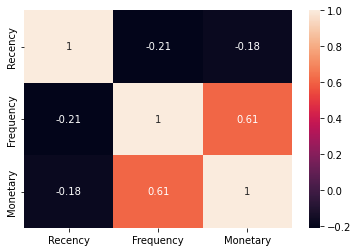

In [63]:
#checking correlation

sns.heatmap(rfm_df.iloc[:,[1,2,3]].corr(), annot=True)
plt.show()

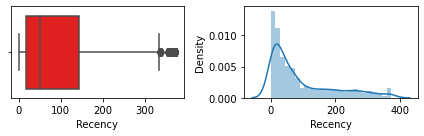

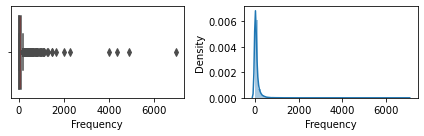

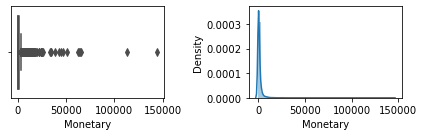

In [65]:
#Visualizing the Recency, Frequency and Monetary distributions.

#Note: Metrics are positively skewed/right skewed. 

columns = ['Recency','Frequency', 'Monetary']

for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=rfm_df[i],orient = 'v',ax = axes[0], color = 'r')
    sns.distplot(rfm_df[i],ax = axes[1])
    fig.tight_layout()

Note:From the above figure, all the variables do not have a symmetrical distribution. 
As seen above, the variables are skewed to the right. 
It is also noted extremelly values (outliers) in Monetary and Frequency variables. 
Since clustering algorithms are sensitive to outliers and require a normal distribution, 
normalization of the data is required. 

In [66]:
#Identifying upper & lower limits-Quantile-based hard edges

upper_limit = rfm_df.iloc[:,[1,2,3]].quantile(0.99)  
lower_limit = rfm_df.iloc[:,[1,2,3]].quantile(0.01)


print("Highest allowed",upper_limit, '\n ')
print("Lowest allowed",lower_limit, '\n ')


print(rfm_df[["Recency"]].skew())
print(rfm_df[["Frequency"]].skew())
print(rfm_df[["Monetary"]].skew())


Highest allowed Recency        369.0000
Frequency      585.8600
Monetary     11924.8627
Name: 0.99, dtype: float64 
 
Lowest allowed Recency       1.000
Frequency     1.000
Monetary     35.769
Name: 0.01, dtype: float64 
 
Recency    1.243721
dtype: float64
Frequency    18.072126
dtype: float64
Monetary    17.169422
dtype: float64


In [67]:
#Capping outliers - Hard edge method

rfm_df[["Recency"]] = np.where(rfm_df[["Recency"]] <1.000, 1.000,rfm_df[["Recency"]])
rfm_df[["Recency"]] = np.where(rfm_df[["Recency"]] >369.0000, 369.0000,rfm_df[["Recency"]])

rfm_df[["Frequency"]] = np.where(rfm_df[["Frequency"]] <1.000, 1.000,rfm_df[["Frequency"]])
rfm_df[["Frequency"]] = np.where(rfm_df[["Frequency"]] >585.8600, 585.8600,rfm_df[["Frequency"]])

rfm_df[["Monetary"]] = np.where(rfm_df[["Monetary"]] <35.769, 35.769,rfm_df[["Monetary"]])
rfm_df[["Monetary"]] = np.where(rfm_df[["Monetary"]] >11924.8627, 11924.8627,rfm_df[["Monetary"]])

print(rfm_df[["Recency"]].skew())
print(rfm_df[["Frequency"]].skew())
print(rfm_df[["Monetary"]].skew())

Recency    1.240881
dtype: float64
Frequency    2.782755
dtype: float64
Monetary    3.397516
dtype: float64


Note : Since the dataset contain wholesale transactions - Decided to cap (hard-edges) the outliers instead of removing them completally and apply log transformation. 

In [68]:
rfm_df.shape

(4270, 9)

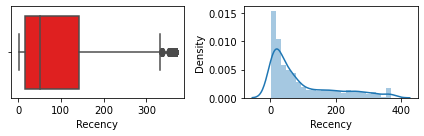

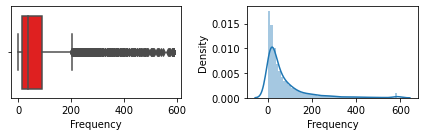

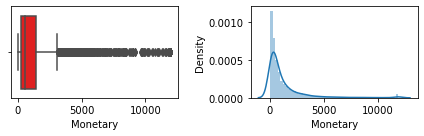

In [70]:
#Note: Metrics are positively skewed or right skewed. 

#Visualizing the Recency, Frequency and Monetary distributions.


columns = ['Recency', 'Frequency','Monetary']

for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=rfm_df[i],orient = 'v',ax = axes[0], color = 'r')
    sns.distplot(rfm_df[i],ax = axes[1])
    fig.tight_layout()

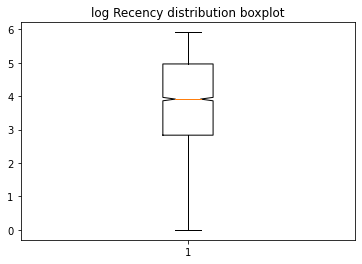

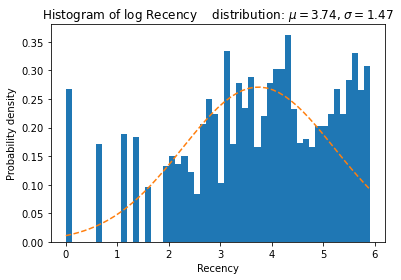

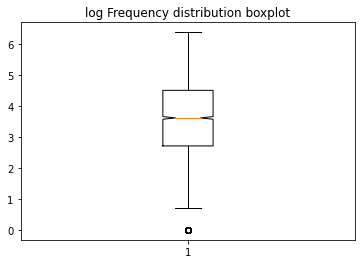

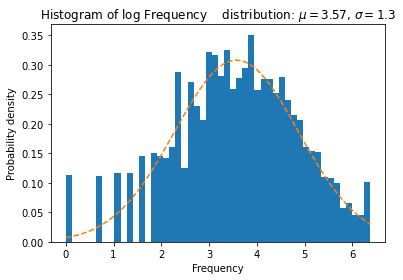

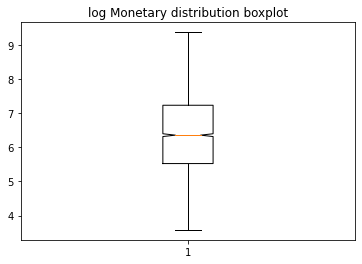

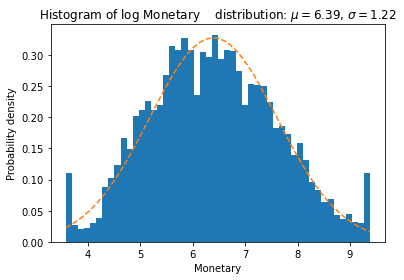

In [71]:
#checking distribution for log_transformation

from math import log

for col_name in ['Recency', 'Frequency','Monetary']:
    
    fig, ax = plt.subplots()
    
    x = rfm_df[col_name]
    
    ln_x = x.apply(lambda x: log(x))
    
    ax.boxplot(x=ln_x, notch=True)
    ax.set_title(f"log {col_name} distribution boxplot")
    
    mu = ln_x.mean()
    sigma = ln_x.std()
    num_bins = 50
    
    fig1, ax1 = plt.subplots()
    
    # the histogram of the data
    n, bins, patches = ax1.hist(ln_x, num_bins, density=True)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    
    mu = round(mu, 2)
    sigma = round(sigma, 2)
    
    ax1.plot(bins, y, '--')
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Probability density')
    ax1.set_title(f'Histogram of log {col_name}\
    distribution: $\mu={mu}$, $\sigma={sigma}$')

In [72]:
#Performing Log transformation to bring data into normal or near normal distribution

rfm_df['r'] =  np.log(rfm_df['Recency']+0.1) #log(0) is undefined
rfm_df['f'] =  np.log(rfm_df['Frequency']+0.1)
rfm_df['m'] = np.log(rfm_df['Monetary']+0.1)


In [73]:
#creating new dataframe

n_rfm = rfm_df[['r', 'f', 'm']]

n_rfm = n_rfm.rename(columns={'r': 'Recency', 'f': 'Frequency', 'm': 'Monetary'})

n_rfm.describe()

,Recency,Frequency,Monetary
count,4270.000000,4270.000000,4270.000000
mean,3.748487,3.581541,6.392635
std,1.459520,1.285637,1.217241
min,0.095310,0.095310,3.579873
25%,2.839078,2.714695,5.527513
50%,3.914021,3.613617,6.362226
75%,4.963544,4.500920,7.240958
max,5.911068,6.373252,9.386389


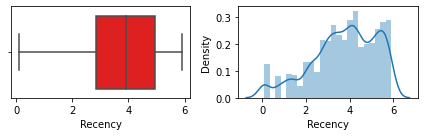

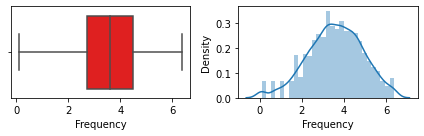

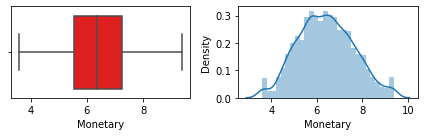

In [74]:
#Checking outliers and distributions after log transformation


columns = ['Recency', 'Frequency','Monetary']

for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=n_rfm[i],orient = 'v',ax = axes[0], color = 'r')
    sns.distplot(n_rfm[i],ax = axes[1])
    fig.tight_layout()

In [75]:
#Making a copy of data

MM_scaled = n_rfm.copy()

In [76]:
from sklearn.preprocessing import StandardScaler

#Bringing the data on same scale
standscale = StandardScaler()
MM_scaled = standscale.fit_transform(MM_scaled)


In [77]:
#Saving as dataframe

MM_scaled = pd.DataFrame(MM_scaled)
MM_scaled.columns = ['Recency','Frequency','Monetary']
MM_scaled.head()

,Recency,Frequency,Monetary
0,-2.060198,1.162407,1.428227
1,0.390814,-0.414059,0.563935
2,-0.584216,0.497428,0.650225
3,1.362530,-0.784861,-0.710538
4,-0.111141,0.583832,0.683894


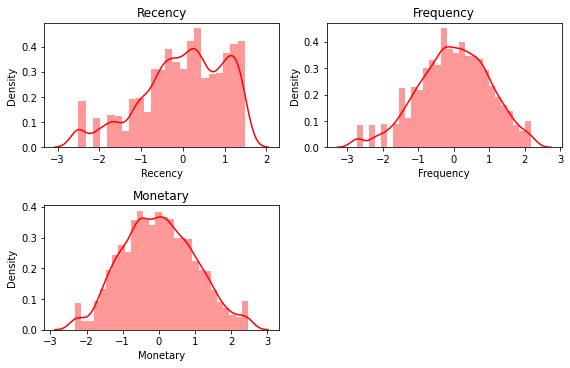

In [78]:
# Visually checking distribution after Scale

columns = ['Recency','Frequency','Monetary']

plt.figure(figsize = (8, 20))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(MM_scaled[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

In [79]:
from sklearn.cluster import KMeans
from sklearn import metrics

#Kmeans clustering (checking for number of k')

# definying a dictionary
results_dict = {}

# definying how many clusters.
num_of_clusters = 10

# runing through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # definying a dictionary to hold the results.
    results_dict[k] = {}

    # fiting the training data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(MM_scaled)
    
    # definying the silhouette score
    sil_score = metrics.silhouette_score(MM_scaled, kmeans.labels_, metric='euclidean')
    
    # storying the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # printing the results    
    print("Number of Clusters: {}".format(k))
    print('silhouette_score', sil_score)
    print('inertia', kmeans.inertia_)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
silhouette_score 0.404815000726263
inertia 6502.357762105064
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
silhouette_score 0.3129503661039162
inertia 4902.752239712742
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
silhouette_score 0.3097959436582124
inertia 4071.456076511653
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
silhouette_score 0.29101829578044736
inertia 3378.9833627138673
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
silhouette_score 0.28844026355965025
inertia 3005.55797063973
--------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------


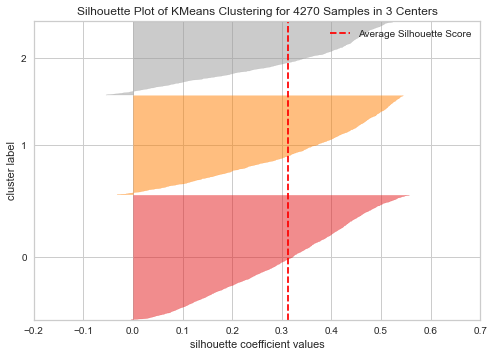

----------------------------------------------------------------------------------------------------


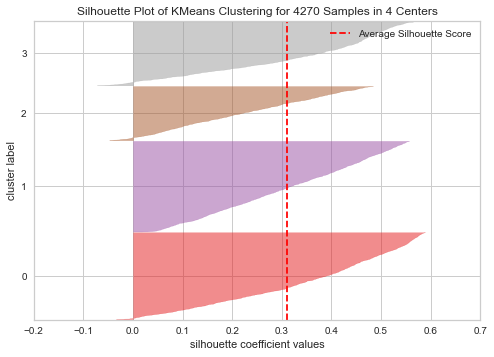

----------------------------------------------------------------------------------------------------


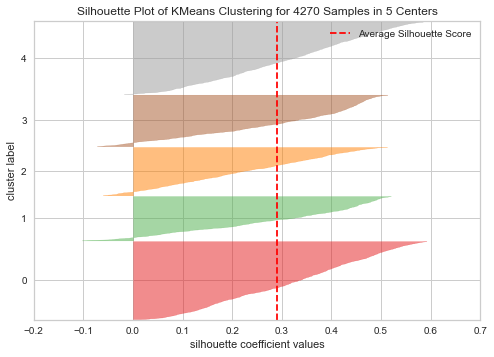

In [81]:
#Checking for best number of K' based on silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

clusters = [3,4,5]

for cluster in clusters:
    
    print('-'*100)

    # defining the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # passing the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fiting the data
    visualizer.fit(MM_scaled)

   
    visualizer.poof()

----------------------------------------------------------------------------------------------------


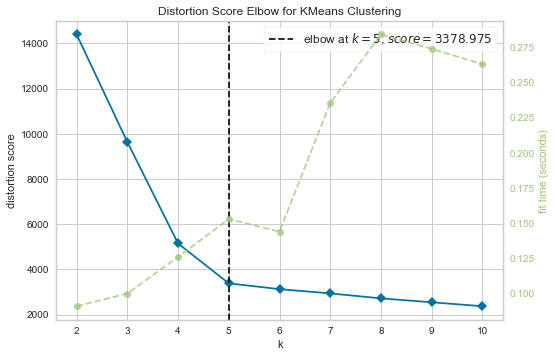

In [147]:
##Checking for best number of K' based on Elbow method

from yellowbrick.cluster import KElbowVisualizer
clusters = [10]

for cluster in clusters:
    
    print('-'*100)

    
    kmeans = KMeans(n_clusters = cluster, random_state=0)

   
    visualizer = KElbowVisualizer(kmeans)

 
    visualizer.fit(MM_scaled)

 
    visualizer.poof()
    

----------------------------------------------------------------------------------------------------


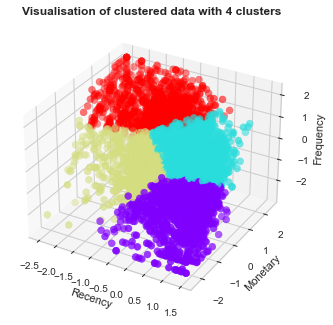

----------------------------------------------------------------------------------------------------


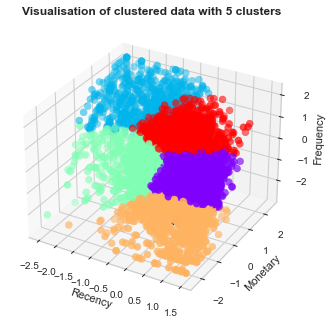

In [83]:
#Visualisation of K'means clusters

clusters = [4,5] 

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(MM_scaled)
    
  
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]

    
    fig = plt.figure(figsize=(4,5))
    ax = Axes3D(fig)


    x = MM_scaled['Recency']
    y = MM_scaled['Monetary']
    z = MM_scaled['Frequency']
    


    column_names = MM_scaled.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[2])
    ax.set_zlabel(column_names[1])

    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='rainbow', s=50)
    ax.scatter(C1, C2, C3, marker="X",s=100, color='black')

    plt.title('Visualisation of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

Note: Based on Elbow method and silhouette_score it seens that the best number of clusters for k-maens are 5. Hierarchical Agglomerative Clustering will also be performed..

**Hierarchical Agglomerative Clustering analysis**

In [84]:
#copying data for Hierarchical Agglomerative Clustering

rfm_h = MM_scaled.copy()

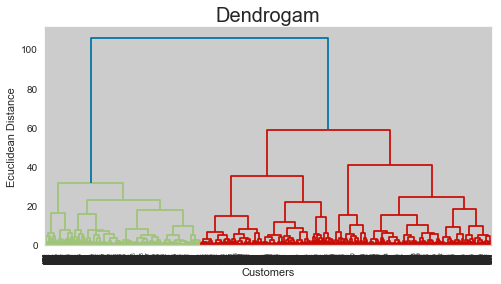

In [85]:
#Visualisation Hierarchical clusters 

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8,4)) 
dendrogram = sch.dendrogram(sch.linkage(rfm_h, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


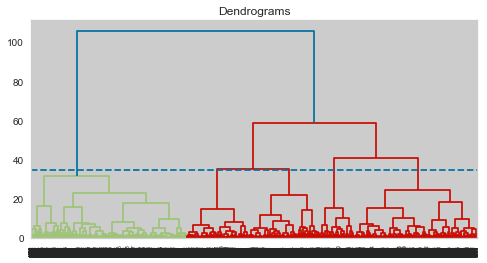

In [86]:
#Best number Hierarchical clusters - potting line to identify

plt.figure(figsize=(8,4)) 
plt.title("Dendrograms")  
hir_df = sch.dendrogram(sch.linkage(rfm_h, method='ward'))
plt.axhline(y=34.9, color='b', linestyle='--')

In [87]:
#Fitting predicting the model

from sklearn.cluster import AgglomerativeClustering

hir_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hir_cluster.fit_predict(rfm_h)

array([3, 4, 2, ..., 1, 3, 2], dtype=int64)

Text(0.5, 1.0, 'Visualisation of Hierarchical Clusters')

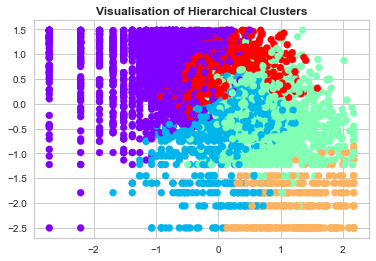

In [121]:
#Visualisation Hierarchical clusters - scatter plot

plt.figure(figsize=(6, 4))  
plt.scatter(rfm_h['Frequency'], rfm_h['Recency'], c=hir_cluster.labels_, cmap='rainbow') 
plt.title('Visualisation of Hierarchical Clusters', fontweight='bold')

In [89]:
#Fitting and predicting K'means clustering

kmeans = results_dict[5]['model']

y_kmeans = kmeans.predict(MM_scaled)

In [90]:
#Checking shape

kmeans.cluster_centers_.shape

(5, 3)

In [91]:

centroids = kmeans.cluster_centers_

In [92]:
#Saving to dataframe 

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [MM_scaled])
cluster_centers

,Recency,Frequency,Monetary
0,0.796102,-0.262857,-0.315019
1,-1.471832,1.272049,1.369212
2,-0.763763,-0.258385,-0.399335
3,0.794714,-1.439455,-1.299548
4,-0.010974,0.705230,0.696225


In [93]:
labels = kmeans.labels_

In [94]:
## Appending clusters (segment) to input features table

MM_scaled['Segment'] = y_kmeans
MM_scaled.head()

,Recency,Frequency,Monetary,Segment
0,-2.060198,1.162407,1.428227,1
1,0.390814,-0.414059,0.563935,0
2,-0.584216,0.497428,0.650225,4
3,1.362530,-0.784861,-0.710538,0
4,-0.111141,0.583832,0.683894,4


<AxesSubplot:xlabel='Segment', ylabel='Monetary'>

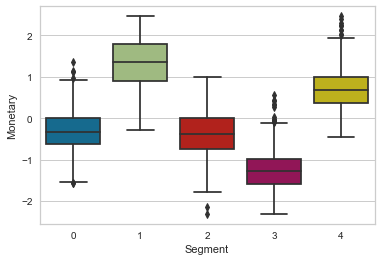

In [139]:
#segement analysis - Customers on segment 1 are the ones who spends the most

plt.subplots(figsize=(6,4))
sns.boxplot(x='Segment', y='Monetary', data=MM_scaled)

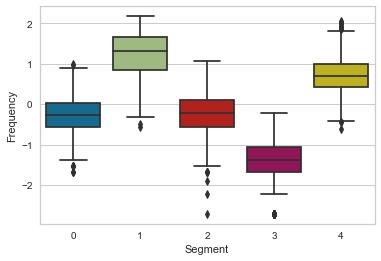

In [140]:
#segement analysis - Customers on segment 1 are the ones who bought the most 

plt.subplots(figsize=(6,4))
sns.boxplot(x='Segment', y='Frequency', data=MM_scaled)
figsize=(6,2)

<AxesSubplot:xlabel='Segment', ylabel='Recency'>

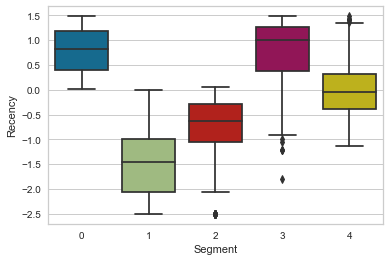

In [142]:
#segement analysis - Customers on segment 1 are the ones who buy with more frequency 

plt.subplots(figsize=(6,4))
sns.boxplot(x='Segment', y='Recency', data=MM_scaled)

In [98]:
#Inverting data to normal scale

invert_rfm = standscale.inverse_transform(MM_scaled[['Recency', 'Frequency', 'Monetary']])

invert_rfm = pd.DataFrame(invert_rfm)
invert_rfm.columns = ['Recency', 'Frequency', 'Monetary']

invert_rfm = pd.concat([invert_rfm, MM_scaled[['Segment']]], axis=1)

invert_rfm.head()

,Recency,Frequency,Monetary,Segment
0,0.741937,5.075799,8.130928,1
1,4.318821,3.049273,7.078999,0
2,2.895912,4.220977,7.184022,4
3,5.736895,2.572612,5.527841,0
4,3.586293,4.332048,7.225001,4


In [99]:
#AntiLog trasnformation to bring data back to original distribution and values

invert_rfm['r'] = invert_rfm['Recency'].apply(lambda x: np.exp(x))
invert_rfm['f'] = invert_rfm['Frequency'].apply(lambda x: np.exp(x))
invert_rfm['m'] = invert_rfm['Monetary'].apply(lambda x: np.exp(x))


In [100]:
#creating new dataframe

rfm = invert_rfm[['r', 'f', 'm', 'Segment']]

rfm = rfm.rename(columns={'r': 'Recency', 'f': 'Frequency', 'm': 'Monetary'})

rfm.describe()

,Recency,Frequency,Monetary,Segment
count,4270.000000,4270.000000,4270.000000,4270.000000
mean,92.326464,74.676342,1253.693820,1.986183
std,100.070746,101.239233,1906.505297,1.538313
min,1.100000,1.100000,35.869000,0.000000
25%,17.100000,15.100000,251.517500,0.000000
50%,50.100000,37.100000,579.535000,2.000000
75%,143.100000,90.100000,1395.430000,3.000000
max,369.100000,585.960000,11924.962700,4.000000


In [101]:
# Converting invoiceDate to int since this contains number of days
    
rfm['Recency'] = rfm['Recency'].astype(int)
rfm['Frequency'] = rfm['Frequency'].astype(int)
rfm['Monetary'] = rfm['Monetary'].astype(float).round(2)


rfm.head(5)

,Recency,Frequency,Monetary,Segment
0,2,160,3397.95,1
1,75,21,1186.78,0
2,18,68,1318.20,4
3,310,13,251.60,0
4,36,76,1373.34,4


In [145]:
## Appending results and creating new table 

Countries = rfm_data.loc[:,['Country']]

DataFinal = pd.concat([rfm, finalRFM[['CustomerID','R_score','F_score', 
                                      'M_score','RFM_Score', 'RFM']], 
                                       Countries[['Country']]], axis=1)


#rearreenging data

RFM_final = DataFinal.reindex(columns=['CustomerID','Recency','Frequency', 
                                       'Monetary','R_score','F_score', 'M_score','RFM_Score', 
                                       'RFM','Segment', 'Country'])

RFM_final

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM,Segment,Country
0,12347.0,2,160,3397.95,4,4,4,12,444,1,Iceland
1,12348.0,75,21,1186.78,2,2,3,7,223,0,Finland
2,12349.0,18,68,1318.20,3,3,3,9,333,4,Italy
3,12350.0,310,13,251.60,1,1,2,4,112,0,Norway
4,12352.0,36,76,1373.34,3,3,3,9,333,4,Norway
...,...,...,...,...,...,...,...,...,...,...,...
4265,18280.0,277,9,165.40,1,1,1,3,111,3,United Kingdom
4266,18281.0,180,4,35.87,1,1,1,3,111,3,United Kingdom
4267,18282.0,7,12,178.15,4,1,1,6,411,2,United Kingdom
4268,18283.0,3,585,1872.13,4,4,4,12,444,1,United Kingdom


Text(0.5, 1.0, 'Scatter Plot of Segments based on RFM analysis')

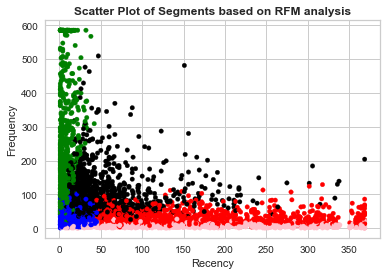

In [103]:
#Visualisation of segments to validate results

from matplotlib import pyplot as plt


##Scatter Plot Frequency Vs Recency

Colors = (["red", "green", "blue","pink","black"])
rfm['Color'] = rfm['Segment'].map(lambda p: Colors[p])
ax = rfm.plot(kind="scatter", x="Recency", y="Frequency", figsize=(6,4), c = rfm['Color'])
plt.title('Scatter Plot of Segments based on RFM analysis', fontweight='bold')

Text(0.5, 1.0, 'Scatter Plot of Segments based on RFM analysis')

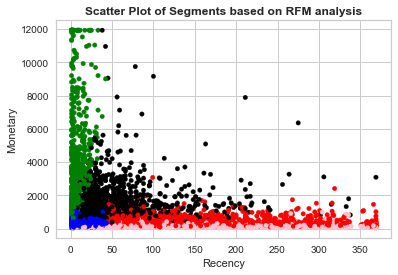

In [104]:
##Scatter Plot Monetary Vs Recency

Colors = (["red", "green", "blue","pink","black"])
rfm['Color'] = rfm['Segment'].map(lambda p: Colors[p])
ax = rfm.plot(kind="scatter", x="Recency", y="Monetary", figsize=(6,4), c = rfm['Color'])
plt.title('Scatter Plot of Segments based on RFM analysis', fontweight='bold')

Text(0.5, 1.0, 'Scatter Plot of Segments based on RFM analysis')

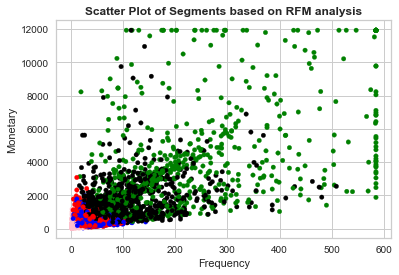

In [105]:
##Scatter Plot Monetary Vs Frequency

Colors = (["red", "green", "blue","pink","black"])
rfm['Color'] = rfm['Segment'].map(lambda p: Colors[p])
ax = rfm.plot(kind="scatter", x="Frequency", y="Monetary", figsize=(6,4), c = rfm['Color'])
plt.title('Scatter Plot of Segments based on RFM analysis', fontweight='bold')

In [106]:
#checking colors each segment belongs too

rfm.groupby("Color").mean()

,Recency,Frequency,Monetary,Segment
Color,,,,
black,55.242366,104.035305,1651.986746,4.0
blue,18.601997,31.631954,444.265621,2.0
green,7.558320,230.841369,4142.059705,1.0
pink,179.324866,6.974599,149.082968,3.0
red,162.723894,29.692920,474.072372,0.0


In [107]:
#Taking averages to label cust segmentation


RFM_final.groupby("Segment").mean()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM
Segment,,,,,,,,,
0,15275.698230,162.723894,29.692920,474.072372,1.549558,2.082301,2.106195,5.738053,177.884956
1,15193.342146,7.558320,230.841369,4142.059705,3.911353,3.835148,3.855365,11.601866,433.342146
2,15354.206847,18.601997,31.631954,444.265621,3.495007,2.101284,2.002853,7.599144,372.516405
3,15338.501337,179.324866,6.974599,149.082968,1.568182,1.040107,1.105615,3.713904,168.324866
4,15280.722328,55.242366,104.035305,1651.986746,2.656489,3.437977,3.418893,9.513359,303.447519


In [108]:
#Labelying Clusters based on scatter and averages

segment = {1:"Platinum",4:"Diamond", 2:"Gold" , 0:"Silver", 3:"Bronze"}
RFM_final["Segment"].replace(segment,inplace=True)
RFM_final

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM,Segment,Country
0,12347.0,2,160,3397.95,4,4,4,12,444,Platinum,Iceland
1,12348.0,75,21,1186.78,2,2,3,7,223,Silver,Finland
2,12349.0,18,68,1318.20,3,3,3,9,333,Diamond,Italy
3,12350.0,310,13,251.60,1,1,2,4,112,Silver,Norway
4,12352.0,36,76,1373.34,3,3,3,9,333,Diamond,Norway
...,...,...,...,...,...,...,...,...,...,...,...
4265,18280.0,277,9,165.40,1,1,1,3,111,Bronze,United Kingdom
4266,18281.0,180,4,35.87,1,1,1,3,111,Bronze,United Kingdom
4267,18282.0,7,12,178.15,4,1,1,6,411,Gold,United Kingdom
4268,18283.0,3,585,1872.13,4,4,4,12,444,Platinum,United Kingdom


In [109]:
# Calculate total customers in each segment
rfm_agg = RFM_final.groupby('Segment').agg({'CustomerID':'count'})
print(rfm_agg)

          CustomerID
Segment             
Bronze           748
Diamond         1048
Gold             701
Platinum         643
Silver          1130


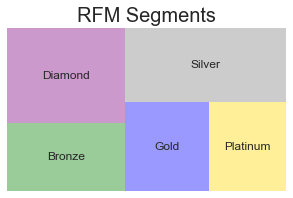

In [144]:
#RFM visualization of customers on each segmentation
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(5, 3)
squarify.plot(sizes=rfm_agg['CustomerID'], 
              label=['Bronze',
                     'Diamond',
                     'Gold',
                     'Platinum',
                     'Silver'], color=["green","purple","blue", "gold","grey"], alpha=0.4)
plt.title("RFM Segments",fontsize=20)
plt.axis('off')
plt.show()

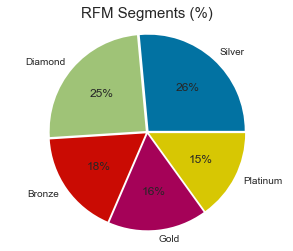

In [111]:
# visualisation of total Customer by segments 

top_seg = RFM_final.groupby('Segment')['CustomerID'].count().sort_values(ascending=False)[:10]
labels = top_seg[:5].index
size = top_seg[:5].values

plt.figure(figsize=(5,4))
plt.pie(size, labels=labels, explode=[0.02]*5, autopct='%1.0f%%')
plt.title("RFM Segments (%)", size=15)
plt.axis('equal')
plt.show()

In [112]:
RFM_final.groupby('Segment').agg({'CustomerID':'count'})


,CustomerID
Segment,
Bronze,748
Diamond,1048
Gold,701
Platinum,643
Silver,1130


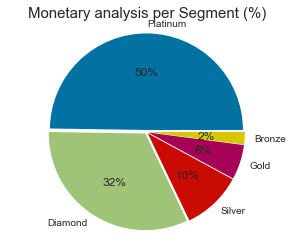

In [113]:
# visualisation Monetary analysis per Segment

top_seg = RFM_final.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)[:10]
labels = top_seg[:5].index
size = top_seg[:5].values

plt.figure(figsize=(5,4))
plt.pie(size, labels=labels, explode=[0.02]*5, autopct='%1.0f%%')
plt.title("Monetary analysis per Segment (%)", size=15)
plt.axis('equal')
plt.show()

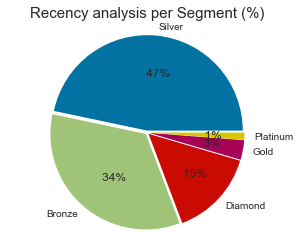

In [114]:
# visualisation Recency analysis per Segment

top_seg = RFM_final.groupby('Segment')['Recency'].sum().sort_values(ascending=False)[:10]
labels = top_seg[:5].index
size = top_seg[:5].values

plt.figure(figsize=(5,4))
plt.pie(size, labels=labels, explode=[0.02]*5, autopct='%5.0f%%')
plt.title("Recency analysis per Segment (%)", size=15)
plt.axis('equal')
plt.show()

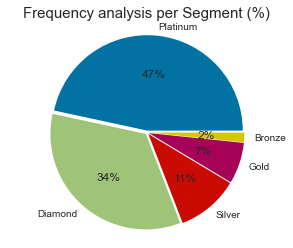

In [115]:
# visualisation Frequency analysis per Segment

top_seg = RFM_final.groupby('Segment')['Frequency'].sum().sort_values(ascending=False)[:10]
labels = top_seg[:5].index
size = top_seg[:5].values

plt.figure(figsize=(5,4))
plt.pie(size, labels=labels, explode=[0.02]*5, autopct='%1.0f%%')
plt.title("Frequency analysis per Segment (%)", size=15)
plt.axis('equal')
plt.show()